# Use wordsfrom articles to form a word cloud
This can be done a couple different ways. A word cloud that represents all articles can be made by looking at all the unique keywords. \
A word cloud for each article can be made by just looking at the article content.

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

### Get articles and NLP so we can extract the keywords as well

In [2]:
with open('../secrets.json') as file:
    secrets = json.load(file)
    connection_string = secrets['connection_string']

db = create_engine(connection_string)
df = pd.read_sql('''
        select * 
        from news_article art inner join news_articlenlp nlp
            on art.id = nlp.article_id
    ''', 
    con=db
)

## Create a word cloud representing all articles

### Extract all keywords

In [3]:
keywords = []

for i in range(len(df)):
    article_keywords = df.iloc[i]['keywords']
    keywords += article_keywords.split(';')
    
# manually remove the word 'said' because it shows up way too often
keywords = [word for word in keywords if word != 'said']
    
keywords[:10]

['really',
 'take',
 'something',
 'show',
 'real',
 'race',
 'proof',
 'project',
 'measurements',
 'disorders']

### Use the keywords to construct a word cloud

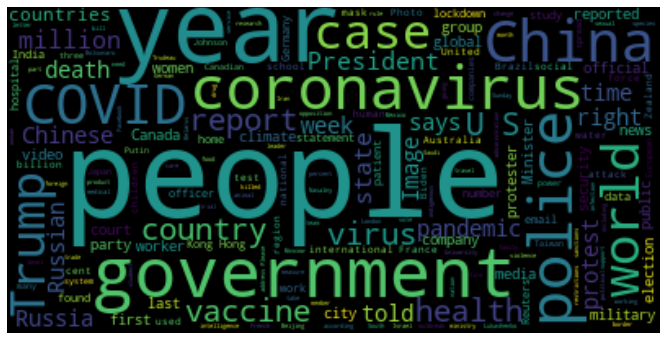

In [4]:
# need a big string with all words for the cloud
words_for_cloud = ' '.join(keywords)
wordcloud = WordCloud().generate(words_for_cloud)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Find word frequencies

In [5]:
word_counts = {}

for word in keywords:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts.update({word: 1})

In [6]:
# show counts for the first 10 words
for key in list(word_counts.keys())[:10]:
    print(f'{key}: {word_counts[key]}')

really: 22
take: 48
something: 7
show: 16
real: 5
race: 4
proof: 3
project: 21
measurements: 1
disorders: 1


### Function to find the top n word counts in a dictionary

In [7]:
def get_top_n_words(counts: dict, n: int) -> dict:
    # turn the dictionary into a 2d array so it's easier to work with
    words = list(counts.keys())
    values = list(counts.values())
    
    # keep track of the indices of the top counts
    max_val_indices = [0 for _ in range(n)]
    
    # For each count, loop over max_val_indices looking for an index that
    # contains a value less than the current value. If it finds one, set that
    # index to the current value index. This results in a list of the top n words
    # sorted in descending order.
    for i in range(len(values)):
        for j in range(len(max_val_indices)):
            if values[i] > values[max_val_indices[j]]:
                max_val_indices[j] = i
                break
    
    # give the results as a dictionary of words and counts
    top_n = {}
    
    for indx in max_val_indices:
        top_n.update({words[indx]: values[indx]})
        
    return top_n

### Show word counts as bar graph

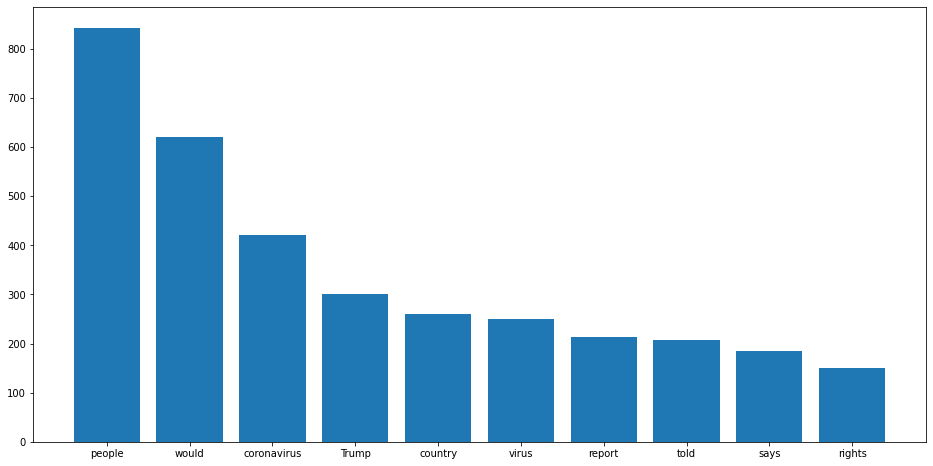

In [10]:
# find the top 10 word counts
top_10 = get_top_n_words(word_counts, 10)

plt.figure(figsize=(16,8))
plt.bar(
    [i for i in range(len(top_10))], 
    [top_10[key] for key in list(top_10.keys())],
    tick_label=[key for key in list(top_10.keys())]
)
plt.show()